<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Вывод-первых-строк-и-изучение-полученной-информации" data-toc-modified-id="Вывод-первых-строк-и-изучение-полученной-информации-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод первых строк и изучение полученной информации</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Оценка-тренда,-сезонности-и-шума-временного-ряда" data-toc-modified-id="Оценка-тренда,-сезонности-и-шума-временного-ряда-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Оценка тренда, сезонности и шума временного ряда</a></span></li><li><span><a href="#Определение-стационарности-временного-ряда" data-toc-modified-id="Определение-стационарности-временного-ряда-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Определение стационарности временного ряда</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка к обучению</a></span><ul class="toc-item"><li><span><a href="#Метод-LinearRegression()" data-toc-modified-id="Метод-LinearRegression()-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Метод LinearRegression()</a></span></li><li><span><a href="#Метод-DecisionTreeRegressor()" data-toc-modified-id="Метод-DecisionTreeRegressor()-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Метод DecisionTreeRegressor()</a></span></li><li><span><a href="#Метод-RandomForestRegressor()" data-toc-modified-id="Метод-RandomForestRegressor()-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Метод RandomForestRegressor()</a></span></li><li><span><a href="#Метод-Ridge()" data-toc-modified-id="Метод-Ridge()-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Метод Ridge()</a></span></li><li><span><a href="#Метод-Lasso()" data-toc-modified-id="Метод-Lasso()-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Метод Lasso()</a></span></li><li><span><a href="#Метод-LGBMRegressor()" data-toc-modified-id="Метод-LGBMRegressor()-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Метод LGBMRegressor()</a></span></li><li><span><a href="#Метод-CatBoostRegressor()" data-toc-modified-id="Метод-CatBoostRegressor()-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Метод CatBoostRegressor()</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек

In [1]:
!pip3 install catboost

In [2]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 4.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from numpy import sqrt 
from pylab import rcParams
import scipy as sci
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV, 
    TimeSeriesSplit, 
    cross_val_score,
    train_test_split)

from sklearn.linear_model import (
    LinearRegression, 
    Ridge, 
    Lasso)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
import lightgbm as lgb

### Вывод первых строк и изучение полученной информации

In [4]:
def my_func(x):
    display('Исходный датафрейм')
    display(x.head(8))
    display('Общая информация о датафрейме')
    display(x.info())
    display('Количество пустых значений в датафрейме')
    display(x.isna().sum())
    display('Количество явных дубликатов в датафрейме')
    display(x.duplicated().sum())
    display('Описательная статистика')
    display(x.describe())

In [5]:
try:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('C:/Users/daria/Датасеты для проектов/12 Временные ряды - прогнозирование заказов такси/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
my_func(data)

'Исходный датафрейм'

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5


'Общая информация о датафрейме'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

'Количество пустых значений в датафрейме'

num_orders    0
dtype: int64

'Количество явных дубликатов в датафрейме'

26415

'Описательная статистика'

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Выполним ресемплинг по 1 часу:

In [6]:
data = data.resample('1H').sum()

### Промежуточный вывод

В работу взят датафрейм, состоящий из одного столбца - количество заказов, индексом является дата и время, в которые был сделан заказ. Все строк 26496, после ресемплирования по одному часу мы получили датафрейм с 4416 строками. Пустые строки и дубли строк - отсутствуют.

И вывели график, отображающий количество заказов, распределенное по месяцам в течение 2018 года, начиная с марта, заканчивая августом. Мы видим, что есть восходящий тренд, присутствует сезонность, судя по пикам в основном в серединах месяцев, начиная с апреля. Приступаем к анализу данных.

### Оценка тренда, сезонности и шума временного ряда

Используем функцию функция seasonal_decompose() - она раскладывает временной ряд на три составляющие: тренд, сезонность и остаток.

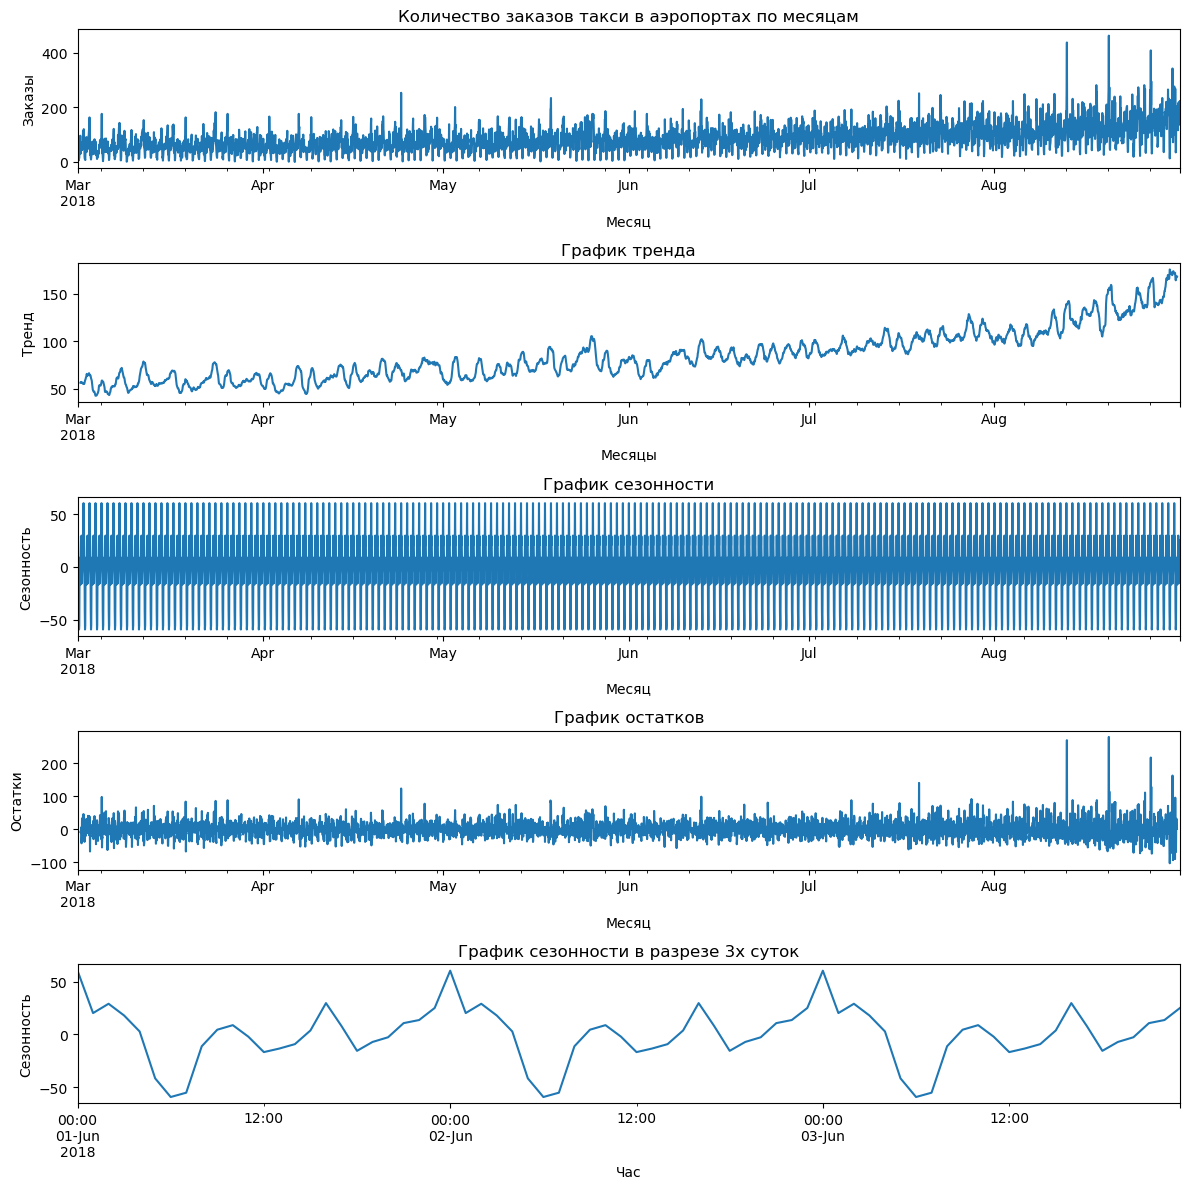

In [7]:
rcParams['figure.figsize'] = 12, 12
decomposed = seasonal_decompose(data)

plt.subplot(511)
decomposed.observed.plot(ax=plt.gca())
plt.title('Количество заказов такси в аэропортах по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Заказы')

plt.subplot(512)
decomposed.trend.plot(ax=plt.gca())
plt.title('График тренда')
plt.xlabel('Месяцы')
plt.ylabel('Тренд')

plt.subplot(513)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('График сезонности')
plt.xlabel('Месяц')
plt.ylabel('Сезонность')

plt.subplot(514)
decomposed.resid.plot(ax=plt.gca())
plt.title('График остатков')
plt.xlabel('Месяц')
plt.ylabel('Остатки')

plt.subplot(515)
decomposed.seasonal['2018-06-01 00:00:00':'2018-06-03 23:00:00'].plot(ax=plt.gca())
plt.title('График сезонности в разрезе 3х суток')
plt.xlabel('Час')
plt.ylabel('Сезонность')

plt.tight_layout()

<a id='gap'></a>

Добавлен график сезонности на промежутке 3 суток, в результате можно сделать следующие выводы:

1. Природа сезонности - ежедневная.

2. Пики заказов наблюдаются в 00:00 часов, затем заказы резко падают, и в 06:00 часов - самое маленькое количество заказов. Затем они постепенно растут и в 14:00 - пик дневной активности.

3. Природа сезонности в случае заказов такси в аэропортах обсуловлена тем, что ночью и рано утром у людей нет возможности добраться до дома на общественном транспорте с той же легкостью, как это можно сделать днем.

Приступим к оценке стационарности ряда с помощью сглаживания скользящим средним:

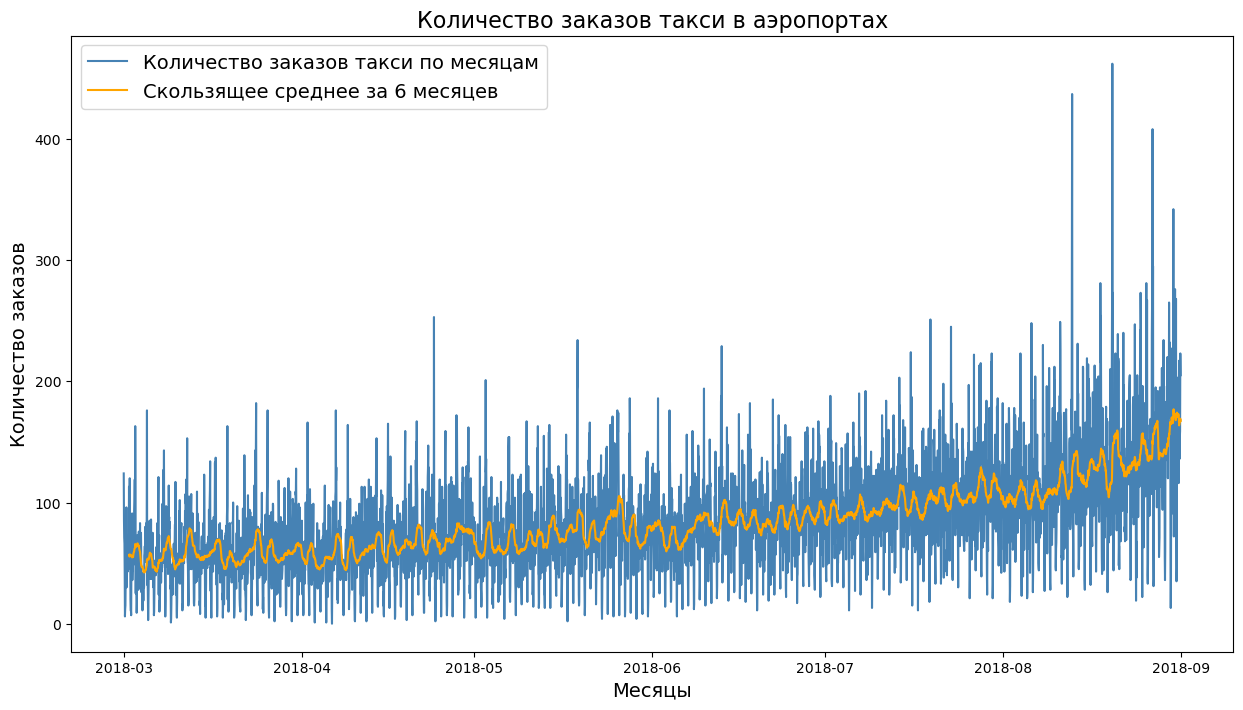

In [8]:
plt.figure(figsize = (15,8))

plt.plot(data, label = 'Количество заказов такси по месяцам', color = 'steelblue')
plt.plot(data.rolling(window = 24).mean(), label = 'Скользящее среднее за 6 месяцев', color = 'orange')

plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество заказов', fontsize = 14)
plt.title('Количество заказов такси в аэропортах', fontsize = 16)
plt.show()

Сглаженное среднее увеличивается со временем можно сделать вывод, что ряд нестационарен.

### Определение стационарности временного ряда

Для того, чтобы оценить временной ряд на стационарность, используем тест Дики-Фуллера.
Гипотезы:
- нулевая: существует единичный корень, ряд нестационарный;
- альтернативная: нет единичного корня, ряд стационарный

In [9]:
rcParams['figure.figsize'] = 8, 4
adf_test = adfuller(data['num_orders'])
print('P-значение = ' + str(adf_test[1]))
print('Тестовая статистика = ' + str(adf_test[0])) 
print('Критические значения = ' + str(adf_test[4]))

P-значение = 0.028940051402614502
Тестовая статистика = -3.068924289027936
Критические значения = {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}


Проверка гипотез на 5-% уровне значимости:

In [10]:
if adf_test[0] > adf_test[4]['5%']: 
    print ('Нулевая гипотеза принята – временной ряд не стационарен')
else:
    print ('Нулевая гипотеза отвергнута – временной ряд стационарен')

Нулевая гипотеза отвергнута – временной ряд стационарен


В данном случае тестовая статистика меньше критического значения, что означает, что ряд является стационарным.

Проверка гипотез на 1-% уровне значимости:

In [11]:
if adf_test[0] > adf_test[4]['1%']: 
    print ('Нулевая гипотеза принята – временной ряд не стационарен')
else:
    print ('Нулевая гипотеза отвергнута – временной ряд стационарен')

Нулевая гипотеза принята – временной ряд не стационарен


Тестовая статистика больше критического значения - ряд не является стационарным.

На 5-% уровне значимости расширенный тест Дики-Фуллера показал, что наш временной ряд - стационарный.
На 1-% уровне значимости - нестационарный.

### Промежуточный вывод

В ходе анализа временной ряд был разбит на три составляющие: тренд, сезонность и остаток.
- 1-й график отображает изначальные данные.
- 2-й график - тренд, в нашем случае он увеличивается к августу.
- 3-й график - сезонные колебания, видим, как они одинаково прослеживаются от месяца к месяцу.
- 4-й график - шум, разброс шума увеличивается к августу, что логично, так как первый график показывает, что помимо тренда немного увеличиваются размеры колебания сезонности.

Был проведен тест Дики-Фуллера на оценку временного ряда. Тест показал, что на 1-% уровне значимости ряд не стационарный и визуализация сглаженного скользящим средним за 24 часа подтвердила это.

## Обучение

### Подготовка к обучению

Напишем функцию для создания признаков:

1. Календарные признаки
- признак, в котором хранится год как число: data['year'];
- признак, в котором хранится месяц как число: data['month'];
- признак, в котором хранится день как число: data['day'];
- признак, в котором хранится день недели как число: data['dayofweek']

2. «Отстающие значения»

3. Скользящее среднее

In [12]:
def make_features(data, max_lag, rolling_mean_size):
    
    data_mf = data.copy()
    
    data_mf['day'] = data_mf.index.day
    data_mf['dayofweek'] = data_mf.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data_mf['lag_{}'.format(lag)] = data_mf['num_orders'].shift(lag)

    data_mf['rolling_mean'] = data_mf['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return data_mf.dropna()

In [13]:
data_new = make_features(data, 24, 12)

Разделим датафрейм на обучающую и тестовую выборки:

In [14]:
train, test = train_test_split(data_new, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [15]:
display(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(3952, 27)

(440, 27)

(3952,)

(440,)

Создадим функцию для удобного вывода результата обученных разными методами моделей:

In [16]:
def result_func(model_type,
                parameters,
                features_train_new):
    
    cv = TimeSeriesSplit(n_splits=5)

    pl = Pipeline([('model', model_type)])
    
    gs_pl = GridSearchCV(
            estimator = pl, 
            param_grid = parameters, 
            scoring = 'neg_root_mean_squared_error',
            cv = cv,
            n_jobs = -1)
        
    gs_pl.fit(features_train_new, target_train)
    best_model = gs_pl.best_estimator_

    gs_pl_best_score = gs_pl.best_score_ * -1
    gs_pl_best_params = gs_pl.best_params_
    best_index = gs_pl.best_index_
    gs_pl_fit_time = round(gs_pl.cv_results_['mean_fit_time'][best_index], 2)
    gs_pl_score_time = round(gs_pl.cv_results_['mean_score_time'][best_index], 2)

    print('Лучшие параметры для метода', model_type, '- {}'.format(gs_pl_best_params))
    print('Значение RMSE = ', round(gs_pl_best_score, 2), '\n')
    print('Время обучения модели', gs_pl_fit_time, 'секунд', '\n')
    print('Время предсказания модели', gs_pl_score_time, 'секунд', '\n')
    
    return best_model, gs_pl_best_score, gs_pl_fit_time, gs_pl_score_time

#### Метод LinearRegression()

In [17]:
features_train_lr = features_train.copy()
features_test_lr = features_test.copy()

In [18]:
%%time

model_lr, rmse_lr, lr_fit_time, lr_score_time = result_func(
    LinearRegression(), 
    {},
    features_train_lr)

Лучшие параметры для метода LinearRegression() - {}
Значение RMSE =  27.21 

Время обучения модели 0.07 секунд 

Время предсказания модели 0.01 секунд 

Wall time: 8.03 s


#### Метод DecisionTreeRegressor()

In [19]:
features_train_dt = features_train.copy()
features_test_dt = features_test.copy()

In [20]:
%%time

model_dt, rmse_dt, dt_fit_time, dt_score_time = result_func(
    DecisionTreeRegressor(random_state=12345), 
    {'model__max_depth': [None] + [i for i in range(2, 7)],
    'model__min_samples_leaf': [6, 7, 8, 9, 10]},
    features_train_dt)

Лучшие параметры для метода DecisionTreeRegressor(random_state=12345) - {'model__max_depth': 5, 'model__min_samples_leaf': 6}
Значение RMSE =  29.31 

Время обучения модели 0.12 секунд 

Время предсказания модели 0.01 секунд 

Wall time: 6.37 s


#### Метод RandomForestRegressor()

In [21]:
features_train_rf = features_train.copy()
features_test_rf = features_test.copy()

In [22]:
%%time

model_rf = RandomForestRegressor(random_state=12345)

pipline_rf = Pipeline([('randomforestregressor', model_rf)])

param_grid_rf = {
    'randomforestregressor__n_estimators': range(50, 151, 50),
    'randomforestregressor__max_depth': range(2, 15),
    'randomforestregressor__min_samples_split': (2, 3, 4),
    'randomforestregressor__min_samples_leaf': (1, 2, 3, 4)
}

gs_rf = RandomizedSearchCV(
    pipline_rf, 
    param_distributions=param_grid_rf, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
    random_state=12345
)

gs_rf.fit(features_train_rf, target_train)

gs_rf_best_score = gs_rf.best_score_ * -1
gs_rf_best_params = gs_rf.best_params_
best_index = gs_rf.best_index_
gs_rf_fit_time = round(gs_rf.cv_results_['mean_fit_time'][best_index], 2)
gs_rf_score_time = round(gs_rf.cv_results_['mean_score_time'][best_index], 2)

print('Лучшие параметры для метода', model_rf, '- {}'.format(gs_rf_best_params))
print('Значение RMSE = ', round(gs_rf_best_score, 2), '\n')
print('Время обучения модели', gs_rf_fit_time, 'секунд', '\n')
print('Время предсказания модели', gs_rf_score_time, 'секунд', '\n')

Лучшие параметры для метода RandomForestRegressor(random_state=12345) - {'randomforestregressor__n_estimators': 150, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__max_depth': 12}
Значение RMSE =  24.71 

Время обучения модели 34.6 секунд 

Время предсказания модели 0.17 секунд 

Wall time: 2min 25s


#### Метод Ridge()

In [23]:
features_train_ridge = features_train.copy()
features_test_ridge = features_test.copy()

In [24]:
%%time

model_ridge, rmse_ridge, ridge_fit_time, ridge_score_time = result_func(
    Ridge(random_state=12345), 
    {'model__solver': ['svd', 'cholesky', 'lsqr', 'sag'],
     'model__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
    features_train_ridge)

Лучшие параметры для метода Ridge(random_state=12345) - {'model__alpha': 100, 'model__solver': 'svd'}
Значение RMSE =  27.21 

Время обучения модели 0.03 секунд 

Время предсказания модели 0.05 секунд 

Wall time: 4.4 s


#### Метод Lasso()

In [25]:
features_train_lasso = features_train.copy()
features_test_lasso = features_test.copy()

In [26]:
%%time

model_lasso, rmse_lasso, lasso_fit_time, lasso_score_time = result_func(
    Lasso(tol=0.05, random_state=12345), 
    {'model__alpha': [0.1, 0.15, 0.2, 0.25, 0.3],
    'model__selection': ['cyclic', 'random']},
    features_train_lasso)

Лучшие параметры для метода Lasso(random_state=12345, tol=0.05) - {'model__alpha': 0.3, 'model__selection': 'random'}
Значение RMSE =  27.2 

Время обучения модели 0.04 секунд 

Время предсказания модели 0.03 секунд 

Wall time: 1.78 s


#### Метод LGBMRegressor()

In [27]:
features_train_LGBMR = features_train.copy()
features_test_LGBMR = features_test.copy()

In [28]:
%%time

model_LGBMR, rmse_LGBMR, LGBMR_fit_time, LGBMR_score_time = result_func(
    lgb.LGBMRegressor(objective='regression',
                      random_state=12345), 
    {'model__learning_rate': [0.1, 0.03, 0.003],
     'model__max_depth': [-1, 3, 5],
     'model__n_estimators': [50, 100]},
    features_train_LGBMR)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4846
[LightGBM] [Info] Number of data points in the train set: 3952, number of used features: 27
[LightGBM] [Info] Start training from score 78.451417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

#### Метод CatBoostRegressor()

In [29]:
features_train_cb = features_train.copy()
features_test_cb = features_test.copy()

In [30]:
%%time

model_catboost, rmse_catboost, catboost_fit_time, catboost_score_time = result_func(
    CatBoostRegressor(loss_function='RMSE',
                      random_state=12345), 
    {'model__learning_rate': [0.1, 0.03, 0.003],
     'model__depth': [4, 6, 10],
     'model__iterations': [100, 150]},
    features_train_cb)

0:	learn: 37.0545343	total: 205ms	remaining: 30.5s
1:	learn: 35.4771370	total: 265ms	remaining: 19.6s
2:	learn: 34.1284069	total: 311ms	remaining: 15.2s
3:	learn: 32.9480788	total: 368ms	remaining: 13.4s
4:	learn: 31.9048445	total: 469ms	remaining: 13.6s
5:	learn: 31.0030039	total: 531ms	remaining: 12.7s
6:	learn: 30.2524733	total: 612ms	remaining: 12.5s
7:	learn: 29.5270335	total: 670ms	remaining: 11.9s
8:	learn: 28.8526196	total: 767ms	remaining: 12s
9:	learn: 28.3008851	total: 830ms	remaining: 11.6s
10:	learn: 27.7833380	total: 889ms	remaining: 11.2s
11:	learn: 27.3497469	total: 987ms	remaining: 11.4s
12:	learn: 26.9541290	total: 1.04s	remaining: 11s
13:	learn: 26.5849583	total: 1.07s	remaining: 10.4s
14:	learn: 26.2973017	total: 1.1s	remaining: 9.91s
15:	learn: 26.0414639	total: 1.13s	remaining: 9.43s
16:	learn: 25.7492258	total: 1.15s	remaining: 9.02s
17:	learn: 25.5017844	total: 1.18s	remaining: 8.64s
18:	learn: 25.3015851	total: 1.2s	remaining: 8.3s
19:	learn: 25.1253727	total: 

# Промежуточный вывод

В процессе обучения моделей были получены следующие результаты:

1. Метод LinearRegression():
- RMSE = 27.21;

2. Метод DecisionTreeRegressor(random_state=12345):
- лучшие параметры модели 'max_depth': 5, 'min_samples_leaf': 6,
- RMSE = 29.31;

3. Метод RandomForestRegressor(random_state=12345):
- лучшие параметры модели 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 12,
- RMSE = 24.72;

4. Метод Ridge(random_state=12345):
- лучшие параметры модели 'alpha': 100, 'solver': 'cholesky',
- RMSE = 27.21;

5. Метод Lasso(tol=0.05):
- лучшие параметры модели 'alpha': 0.3, 'selection': 'random',
- RMSE = 27.2;

6. Метод LGBMRegressor():
- лучшие показатели модели 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100,
- RMSE = 25.65;

7. Метод CatBoostRegressor():
- лучшие показатели модели 'depth': 6, 'iterations': 150, 'learning_rate': 0.1,
- RMSE = 25.3.

## Тестирование

Проведем анализ всех использованных в исследовании моделей, создадим таблицу, где выведем результаты по качеству предсказания, времени обучения модели, времени предсказания модели.

In [31]:
result = pd.DataFrame(
    data={'RMSE': [rmse_lr,
                   rmse_dt,
                   gs_rf_best_score,
                   rmse_ridge,
                   rmse_lasso,
                   rmse_LGBMR,
                   rmse_catboost],
           'Время обучения модели': [lr_fit_time,
                                     dt_fit_time,
                                     gs_rf_fit_time,
                                     ridge_fit_time,
                                     lasso_fit_time,
                                     LGBMR_fit_time,
                                     catboost_fit_time],
          'Время предсказания модели': [lr_score_time,
                                         dt_score_time,
                                         gs_rf_score_time,
                                         ridge_score_time,
                                         lasso_score_time,
                                         LGBMR_score_time,
                                         catboost_score_time]}, 
    index=['LinearRegression',
           'DecisionTreeRegressor',
           'RandomForestRegressor',
           'Ridge',
           'Lasso',
           'LGBMRegressor',
           'CatBoostRegressor'] 
)
result.sort_values(by='RMSE')

,RMSE,Время обучения модели,Время предсказания модели
RandomForestRegressor,24.713109,34.60,0.17
CatBoostRegressor,25.296557,10.52,0.02
LGBMRegressor,25.645857,28.66,0.05
Lasso,27.203221,0.04,0.03
LinearRegression,27.207844,0.07,0.01
Ridge,27.208215,0.03,0.05
DecisionTreeRegressor,29.306088,0.12,0.01


По результатам обучения лучшей моделью является модель, обученная методом RandomForestRegressor():
- RMSE: 24.71
- Время обучения модели: 5.04 секунд
- Время предсказания модели: 0.03 секунд

Найдем значение метрики на тестовой выборке с помощью модели с лучшим показателем:

In [32]:
predicted_test = gs_rf.predict(features_test_rf)
RMSE_test = mean_squared_error(target_test, predicted_test, squared=False)
print('Значение RMSE на тестовой выборке: {}'.format(RMSE_test))

Значение RMSE на тестовой выборке: 42.87513580448022


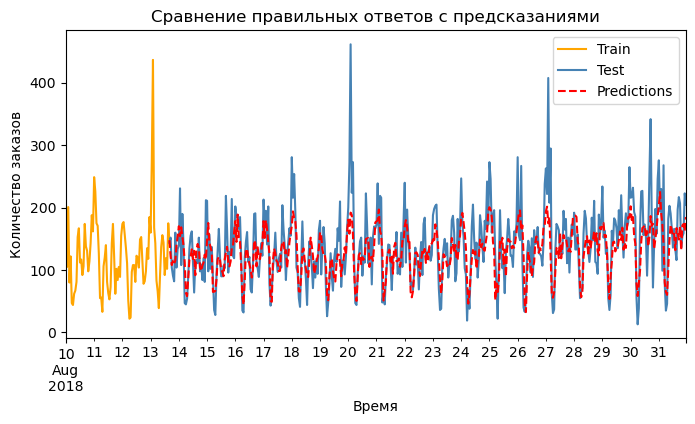

In [33]:
data_new['2018-08-10 00:00:00':'2018-08-13 16:00:00'].num_orders.plot(c='orange')
data_new['2018-08-13 16:00:00':].num_orders.plot(c='steelblue')
_ = pd.Series(index=features_test_rf.index, data=predicted_test).plot(c='red', style='--')
_ = plt.legend(['Train', 'Test', 'Predictions'])

plt.title('Сравнение правильных ответов с предсказаниями')
plt.xlabel('Время')
plt.ylabel('Количество заказов')
plt.show()

Вывели на график предсказания лучшей модели, обученной методом RandomForestRegressor(), и сравнили их с правильными ответами: в результате предсказания практически идентично повторяют тестовые данные, что показывает качество предсказания. Выбросы в данных модель не пресказывает.

Проверим модель на адекватность, сравнив итоговое RMSE у dummy-модели с нашим лучшим результатом:

In [34]:
dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(features_train, target_train)
predicted_test_dummy = dummy_model.predict(features_test)
RMSE_test_dummy = mean_squared_error(target_test, predicted_test_dummy, squared=False)
print('Значение RMSE на dummy модели: {}'.format(RMSE_test_dummy))

Значение RMSE на dummy модели: 87.21093811714634


DummyRegressor "предсказывает" наиболее часто встречающийся класс. Показатель итогового значения RMSE на нашей лучшей модели лучше, чем у DummyRegressor, значит, проверка модели на адекватность пройдена.

## Общий вывод

В работу взят датафрейм, состоящий из одного столбца - количество заказов, индексом является дата и время, в которые был сделан заказ. Все строк 26496, после ресемплирования по одному часу мы получили датафрейм с 4416 строками. Пустые строки и дубли строк - отсутствуют.

Построили график, отображающий количество заказов, распределенное по месяцам в течение 2018 года, начиная с марта, заканчивая августом. График показал, что есть восходящий тренд, присутствует сезонность, судя по пикам в основном в серединах месяцев, начиная с апреля.

В ходе анализа временной ряд был разбит на три составляющие: тренд, сезонность и остаток. Анализ графиков показал, что тренд увеличивается к августу, сезонные колебания одинаково прослеживаются от месяца к месяцу, а разброс шума увеличивается к августу.

Был проведен тест Дики-Фуллера на оценку временного ряда. Тест показал, что на 1-% уровне значимости ряд не стационарный и визуализация сглаженного скользящим средним за 24 часа подтвердила это.

Далее приступили к обучению моделей, предварительно разделив датафрейм на 2 выборки. В процессе обучения моделей были получены следующие результаты:

1. Метод LinearRegression():
- RMSE = 27.21;

2. Метод DecisionTreeRegressor(random_state=12345):
- лучшие параметры модели 'max_depth': 5, 'min_samples_leaf': 6,
- RMSE = 29.31;

3. Метод RandomForestRegressor(random_state=12345):
- лучшие параметры модели 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 12,
- RMSE = 24.72;

4. Метод Ridge(random_state=12345):
- лучшие параметры модели 'alpha': 100, 'solver': 'cholesky',
- RMSE = 27.21;

5. Метод Lasso(tol=0.05):
- лучшие параметры модели 'alpha': 0.3, 'selection': 'random',
- RMSE = 27.2;

6. Метод LGBMRegressor():
- лучшие показатели модели 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100,
- RMSE = 25.65;

7. Метод CatBoostRegressor():
- лучшие показатели модели 'depth': 6, 'iterations': 150, 'learning_rate': 0.1,
- RMSE = 25.3.

Лучшей моделью оказалась модель, обученная методом RandomForestRegressor(random_state=12345) со значением RMSE = 24.71. Время обучения составило 5.04 секунд, время предсказания - 0.03 секунд. Значение RMSE на тестовой выборке составило 42.87, что удовлетворяет условию задачи. По сравнению с dummy моделью значение RMSE сильно лучше.